# Economic and Poverty Data

Datasets: 

https://databank.worldbank.org/source/world-development-indicators#

Credit to ChatGPT for help writing code

Author: Max Talwar

## Initial Setup

In [1]:
# Import libraries, set up our display preferences
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.stats import pearsonr

pd.set_option("display.max_columns", 200)

In [22]:
# Load our dataframe
df = pd.read_csv("data/poverty_data.csv")

## Understand the Data

In [2]:
# Get a sense for how big out dataset is
df.shape

(1301, 38)

In [3]:
# See what our column names are since some of them are long; this will help us pick columns later
df.columns

Index(['Time', 'Time Code', 'Country Name', 'Country Code',
       'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]',
       'Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]',
       'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
       'Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS]',
       'Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC]',
       'Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE]',
       'External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]',
       'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
       'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]',
       'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
       'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
       'High-technology exports (% of manufactured exports) [TX.VAL.TE

In [23]:
# Look at our data
df.head(50)

,Time,Time Code,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]",Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS],Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC],Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],"Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]",Income share held by lowest 20% [SI.DST.FRST.20],"Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Net migration [SM.POP.NETM],Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]",Population density (people per sq. km of land area) [EN.POP.DNST],"Population, total [SP.POP.TOTL]",Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY],Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC],"Prevalence of underweight, weight for age (% of children under 5) [SH.STA.MALN.ZS]","School enrollment, primary (% gross) [SE.PRM.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]",Time required to start a business (days) [IC.REG.DURS],"Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Urban population growth (annual %) [SP.URB.GROW],Age dependency ratio (% of working-age population) [SP.POP.DPND],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
0,2017,YR2017,Afghanistan,AFG,90.342,53.4,0.281195815732375,..,..,..,2751986638.9,5.129,51533896.765,18753456506.5708,2.6470032019574,2120,..,67,..,63.016,0.945226799939516,67.13641492,64.6,-47090,3811739990.23438,822731630.245558,54.6485411587937,3.564342e+07,..,..,..,106.129997253418,55.4021492004395,8.5,4.35357201508207,3.7815566165204,90.543094,563.488239421983
1,2017,YR2017,Bangladesh,BGD,78.29,67.8,0.541787825904309,..,..,..,51068283464.6,2.043,1810395803.56746,293754781336,6.5902548153114,5000,..,97,..,71.788,1.12758110771325,93.29458051,34.1,-175755,3781770019.53125,13501933032.7097,1242.94356610586,1.617940e+08,..,..,..,109.125358581543,64.8559494018555,19.5,5.79903429874665,3.43472587197033,51.291759,1376.60352606198
2,2017,YR2017,Bhutan,BTN,24.207,96.4,1.73186566700303,..,..,..,2607950876.9,1.704,-16553759.9525493,2591358114.48376,4.65183467529613,10660,..,97,6.7,70.847,..,96.62766062,30.6,291,118540000.915527,43153828.4255767,19.8228030620805,7.561210e+05,0.9,8.2,..,99.7384338378906,86.6147003173828,12,11.0517704607358,2.7015276541538,46.421005,2998.47320692901
3,2017,YR2017,India,IND,20.42,..,1.70492672078233,..,..,..,511575707373.6,2.2,39966091358.7384,2651474262735.28,6.79538342343425,6050,7.36067282279695,90,8.2,70.467,2.53151136056791,86.31708801,38.7,-219656,3198139892.57813,68967175499.8665,455.468934040542,1.354196e+09,13.4,..,33.4,..,71.920539855957,29.8,10.0846800379296,2.407475136258,50.684828,1795.91184972767
4,2017,YR2017,Maldives,MDV,10.086,99.5,3.27257102459138,65.2579932555074,..,..,1465723991.1,1.845,457808313.566538,4816426259.51373,7.05453899044939,17720,0.143975890139075,99,..,79.943,..,190.5249745,8.3,11665,46479999.5422363,4016988.86541627,1574.80666666667,4.724420e+05,..,..,14.8,96.9436416625977,..,12,4.84709825811693,5.01431494748377,36.030

## Data Processing/Preparation

### Dropping Unecessary/Unused Columns

We're trying to draw interesting correlations from this data -- that would be hard to do with columns that are pretty much empty. Based on the table above, we'll drop empty columns, which will give us a more targeted list of variables to choose from. 

In [24]:
# These columns are all basically empty/very sparsely populated
df = df.drop('Electric power consumption (kWh per capita) [EG.USE.ELEC.KH.PC]', axis=1)
df = df.drop('Energy use (kg of oil equivalent per capita) [EG.USE.PCAP.KG.OE]', axis=1)
df = df.drop('Domestic credit provided by financial sector (% of GDP) [FS.AST.DOMS.GD.ZS]', axis=1)
df = df.drop('Income share held by lowest 20% [SI.DST.FRST.20]', axis=1)
df = df.drop('Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population) [SI.POV.DDAY]', axis=1)
df = df.drop('Poverty headcount ratio at national poverty lines (% of population) [SI.POV.NAHC]', axis=1)
df = df.drop('Prevalence of underweight, weight for age (% of children under 5) [SH.STA.MALN.ZS]', axis=1)
df = df.drop('Births attended by skilled health staff (% of total) [SH.STA.BRTC.ZS]', axis=1)

# This column is redundant
df = df.drop('Time Code', axis=1)

df.head(50)


,Time,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]",CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],"Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Net migration [SM.POP.NETM],Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]",Population density (people per sq. km of land area) [EN.POP.DNST],"Population, total [SP.POP.TOTL]","School enrollment, primary (% gross) [SE.PRM.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]",Time required to start a business (days) [IC.REG.DURS],"Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Urban population growth (annual %) [SP.URB.GROW],Age dependency ratio (% of working-age population) [SP.POP.DPND],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
0,2017,Afghanistan,AFG,90.342,0.281195815732375,2751986638.9,5.129,51533896.765,18753456506.5708,2.6470032019574,2120,..,67,63.016,0.945226799939516,67.13641492,64.6,-47090,3811739990.23438,822731630.245558,54.6485411587937,3.564342e+07,106.129997253418,55.4021492004395,8.5,4.35357201508207,3.7815566165204,90.543094,563.488239421983
1,2017,Bangladesh,BGD,78.29,0.541787825904309,51068283464.6,2.043,1810395803.56746,293754781336,6.5902548153114,5000,..,97,71.788,1.12758110771325,93.29458051,34.1,-175755,3781770019.53125,13501933032.7097,1242.94356610586,1.617940e+08,109.125358581543,64.8559494018555,19.5,5.79903429874665,3.43472587197033,51.291759,1376.60352606198
2,2017,Bhutan,BTN,24.207,1.73186566700303,2607950876.9,1.704,-16553759.9525493,2591358114.48376,4.65183467529613,10660,..,97,70.847,..,96.62766062,30.6,291,118540000.915527,43153828.4255767,19.8228030620805,7.561210e+05,99.7384338378906,86.6147003173828,12,11.0517704607358,2.7015276541538,46.421005,2998.47320692901
3,2017,India,IND,20.42,1.70492672078233,511575707373.6,2.2,39966091358.7384,2651474262735.28,6.79538342343425,6050,7.36067282279695,90,70.467,2.53151136056791,86.31708801,38.7,-219656,3198139892.57813,68967175499.8665,455.468934040542,1.354196e+09,..,71.920539855957,29.8,10.0846800379296,2.407475136258,50.684828,1795.91184972767
4,2017,Maldives,MDV,10.086,3.27257102459138,1465723991.1,1.845,457808313.566538,4816426259.51373,7.05453899044939,17720,0.143975890139075,99,79.943,..,190.5249745,8.3,11665,46479999.5422363,4016988.86541627,1574.80666666667,4.724420e+05,96.9436416625977,..,12,4.84709825811693,5.01431494748377,36.030371,9972.37714365815
5,2017,Nepal,NPL,70.165,0.470677340646946,4963402939.1,2.15,196265098.563575,28971588880.3546,8.97727935643466,3530,1.1842599479754,90,68.91,1.48497718496345,128.0766788,32.1,-78062,1269650024.41406,6928133767.08804,196.605692361353,2.818343e+07,135.194442749023,76.0962066650391,18.5,8.48049668523619,3.20864276792533,60.799323,946.042557955599
6,2017,Pakistan,PAK,45.803,0.918472672488548,93158143047.2,3.759,2496000000,339205534861.1,4.43262590683975,4820,2.1763687688896,76,66.297,3.08231782700656,66.79261828,71.8,-1574581,2364310058.59375,19856000000,280.691748391449,2.163797e+08,78.8430633544922,35.8526802062988,19.5,22.5483595742173,1.90054008619129,72.743101,1542.90407107682
7,2017,Sri Lanka,LKA,16.073,1.0759613709386,50765545978.7,2.05

### Dropping Unecessary/Unused Rows

Oftentimes macro-data takes a few years to populate and verify. So in order to make sure we're working with well-verified and high-quality data, we want to look at datapoints from a few years ago. 2017 seems like a good cutoff. We also only want to look at one year at a time because correlations can change over time, and blending data points from different years could throw off our analysis. So we want to filter out any rows that don't involve data from 2017. 

In [25]:
# Looking at the unique values in the "Time" column to make sure we're filtering properly
df["Time"].unique()

array(['2017', '2018', '2019', '2020', '2021', '2022', nan,
       'Data from database: World Development Indicators',
       'Last Updated: 12/18/2023'], dtype=object)

In [26]:
# Now we filter out any row with a value in the "Time" column other than '2017'
df = df[df['Time'] == '2017']

# Checking to make sure we have filtered out all values not in 2017 successfully 
df

,Time,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]",CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],"External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]","Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]","Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]",GDP (current US$) [NY.GDP.MKTP.CD],GDP growth (annual %) [NY.GDP.MKTP.KD.ZG],"GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]",High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS],"Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]","Life expectancy at birth, total (years) [SP.DYN.LE00.IN]",Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS],Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2],"Mortality rate, under-5 (per 1,000 live births) [SH.DYN.MORT]",Net migration [SM.POP.NETM],Net official development assistance and official aid received (current US$) [DT.ODA.ALLD.CD],"Personal remittances, received (current US$) [BX.TRF.PWKR.CD.DT]",Population density (people per sq. km of land area) [EN.POP.DNST],"Population, total [SP.POP.TOTL]","School enrollment, primary (% gross) [SE.PRM.ENRR]","School enrollment, secondary (% gross) [SE.SEC.ENRR]",Time required to start a business (days) [IC.REG.DURS],"Total debt service (% of exports of goods, services and primary income) [DT.TDS.DECT.EX.ZS]",Urban population growth (annual %) [SP.URB.GROW],Age dependency ratio (% of working-age population) [SP.POP.DPND],GDP per capita (constant 2015 US$) [NY.GDP.PCAP.KD]
0,2017,Afghanistan,AFG,90.342,0.281195815732375,2751986638.9,5.129,51533896.765,18753456506.5708,2.6470032019574,2120,..,67,63.016,0.945226799939516,67.13641492,64.6,-47090,3811739990.23438,822731630.245558,54.6485411587937,3.564342e+07,106.129997253418,55.4021492004395,8.5,4.35357201508207,3.7815566165204,90.543094,563.488239421983
1,2017,Bangladesh,BGD,78.29,0.541787825904309,51068283464.6,2.043,1810395803.56746,293754781336,6.5902548153114,5000,..,97,71.788,1.12758110771325,93.29458051,34.1,-175755,3781770019.53125,13501933032.7097,1242.94356610586,1.617940e+08,109.125358581543,64.8559494018555,19.5,5.79903429874665,3.43472587197033,51.291759,1376.60352606198
2,2017,Bhutan,BTN,24.207,1.73186566700303,2607950876.9,1.704,-16553759.9525493,2591358114.48376,4.65183467529613,10660,..,97,70.847,..,96.62766062,30.6,291,118540000.915527,43153828.4255767,19.8228030620805,7.561210e+05,99.7384338378906,86.6147003173828,12,11.0517704607358,2.7015276541538,46.421005,2998.47320692901
3,2017,India,IND,20.42,1.70492672078233,511575707373.6,2.2,39966091358.7384,2651474262735.28,6.79538342343425,6050,7.36067282279695,90,70.467,2.53151136056791,86.31708801,38.7,-219656,3198139892.57813,68967175499.8665,455.468934040542,1.354196e+09,..,71.920539855957,29.8,10.0846800379296,2.407475136258,50.684828,1795.91184972767
4,2017,Maldives,MDV,10.086,3.27257102459138,1465723991.1,1.845,457808313.566538,4816426259.51373,7.05453899044939,17720,0.143975890139075,99,79.943,..,190.5249745,8.3,11665,46479999.5422363,4016988.86541627,1574.80666666667,4.724420e+05,96.9436416625977,..,12,4.84709825811693,5.01431494748377,36.030371,9972.37714365815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2017,Vanuatu,VUT,67.814,0.485806524967354,401420199.8,3.91,39694418.3554052,880061833.690341,6.31730538443077,3040,..,80,69.71,..,78.56146142,26,-403,132699996.948242,107404450.674916,23.8095980311731,2.902390e+05,..,..,18,2.27986363093964,2.85132465785753,77.051180,2802.77893916872
212,2017,Viet Nam,VNM,34.291,2.44464478063074,109867474470.1,1.93,14100000000,281353605986.903,6.94019037359206,8500,41.7380671214965,97,73.963,2.26796977611754,127.6319162,21.5,-3847,2407489990.23438,9241413620.28302,300.038761594497,9.403305e+07,109.942230224609,88.9568557739258,22,6.28568262839945,2.98533941955856,44.182809,2903.0282019

We've now filtered out all non-2017 data points, leaving us with 216 rows of data. 

### Cleaning Up Our Column Names

A lot of our column names are pretty ugly, so we'll clean them up to make our data more readable.

In [8]:
# See our columns again to get a sense for what can be changed. 
df.columns

Index(['Time', 'Country Name', 'Country Code',
       'Adolescent fertility rate (births per 1,000 women ages 15-19) [SP.ADO.TFRT]',
       'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
       'External debt stocks, total (DOD, current US$) [DT.DOD.DECT.CD]',
       'Fertility rate, total (births per woman) [SP.DYN.TFRT.IN]',
       'Foreign direct investment, net inflows (BoP, current US$) [BX.KLT.DINV.CD.WD]',
       'GDP (current US$) [NY.GDP.MKTP.CD]',
       'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
       'GNI per capita, PPP (current international $) [NY.GNP.PCAP.PP.CD]',
       'High-technology exports (% of manufactured exports) [TX.VAL.TECH.MF.ZS]',
       'Immunization, measles (% of children ages 12-23 months) [SH.IMM.MEAS]',
       'Life expectancy at birth, total (years) [SP.DYN.LE00.IN]',
       'Military expenditure (% of GDP) [MS.MIL.XPND.GD.ZS]',
       'Mobile cellular subscriptions (per 100 people) [IT.CEL.SETS.P2]',
       'Mortality rate, under-5 (

In [27]:
# Credit to ChatGPT for writing this code

# It would be pretty time consuming and ugly to rename each of our 40 columns individually, so we'll use a function to do it (ChatGPT helped with this)
def rename_columns(df):
    new_column_names = {}
    for column in df.columns:
        # Use regex to remove the bracketed part
        new_name = re.sub(r"\s*\[.*\]", "", column)
        new_column_names[column] = new_name
    df.rename(columns=new_column_names, inplace=True)

rename_columns(df)

df

,Time,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP growth (annual %),"GNI per capita, PPP (current international $)",High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),"Population, total","School enrollment, primary (% gross)","School enrollment, secondary (% gross)",Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %),Age dependency ratio (% of working-age population),GDP per capita (constant 2015 US$)
0,2017,Afghanistan,AFG,90.342,0.281195815732375,2751986638.9,5.129,51533896.765,18753456506.5708,2.6470032019574,2120,..,67,63.016,0.945226799939516,67.13641492,64.6,-47090,3811739990.23438,822731630.245558,54.6485411587937,3.564342e+07,106.129997253418,55.4021492004395,8.5,4.35357201508207,3.7815566165204,90.543094,563.488239421983
1,2017,Bangladesh,BGD,78.29,0.541787825904309,51068283464.6,2.043,1810395803.56746,293754781336,6.5902548153114,5000,..,97,71.788,1.12758110771325,93.29458051,34.1,-175755,3781770019.53125,13501933032.7097,1242.94356610586,1.617940e+08,109.125358581543,64.8559494018555,19.5,5.79903429874665,3.43472587197033,51.291759,1376.60352606198
2,2017,Bhutan,BTN,24.207,1.73186566700303,2607950876.9,1.704,-16553759.9525493,2591358114.48376,4.65183467529613,10660,..,97,70.847,..,96.62766062,30.6,291,118540000.915527,43153828.4255767,19.8228030620805,7.561210e+05,99.7384338378906,86.6147003173828,12,11.0517704607358,2.7015276541538,46.421005,2998.47320692901
3,2017,India,IND,20.42,1.70492672078233,511575707373.6,2.2,39966091358.7384,2651474262735.28,6.79538342343425,6050,7.36067282279695,90,70.467,2.53151136056791,86.31708801,38.7,-219656,3198139892.57813,68967175499.8665,455.468934040542,1.354196e+09,..,71.920539855957,29.8,10.0846800379296,2.407475136258,50.684828,1795.91184972767
4,2017,Maldives,MDV,10.086,3.27257102459138,1465723991.1,1.845,457808313.566538,4816426259.51373,7.05453899044939,17720,0.143975890139075,99,79.943,..,190.5249745,8.3,11665,46479999.5422363,4016988.86541627,1574.80666666667,4.724420e+05,96.9436416625977,..,12,4.84709825811693,5.01431494748377,36.030371,9972.37714365815
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,2017,Vanuatu,VUT,67.814,0.485806524967354,401420199.8,3.91,39694418.3554052,880061833.690341,6.31730538443077,3040,..,80,69.71,..,78.56146142,26,-403,132699996.948242,107404450.674916,23.8095980311731,2.902390e+05,..,..,18,2.27986363093964,2.85132465785753,77.051180,2802.77893916872
212,2017,Viet Nam,VNM,34.291,2.44464478063074,109867474470.1,1.93,14100000000,281353605986.903,6.94019037359206,8500,41.7380671214965,97,73.963,2.26796977611754,127.6319162,21.5,-3847,2407489990.23438,9241413620.28302,300.038761594497,9.403305e+07,109.942230224609,88.9568557739258,22,6.28568262839945,2.98533941955856,44.182809,2903.02820194861
213,2017,Virgin Islands (U.S.),VIR,33.116,..,..,2.08,..,3794000000,-0.735294117647058,..,..,..,79.3682926829268,..,..,..,-471,..,..,306.517142857143,1.072810e+05,..,..,..,..,-0.0896598832113406,60.501788,34435.4944455756
214,2017,Zambia,ZMB,128.315,0.393726369451731,24088625849.7,4.614,1107519804.84533,25873601260.8353,3.50433609558682,3240,4.48448622233689,96,62.12,1.30000405055903,77.68815498,64.2,20268,1040489990.23438

### Converting Columns to Numeric

In [29]:
# Credit to ChatGPT for writing this code

# Step 1: List of all columns you want to convert, excluding specific ones
columns_to_convert = df.columns.difference(['Country Name', 'Country Code'])

# Step 2: Convert the selected columns to numeric, coercing errors to NaN
for column in columns_to_convert:
    df[column] = pd.to_numeric(df[column], errors='coerce')

df.head(50)

,Time,Country Name,Country Code,"Adolescent fertility rate (births per 1,000 women ages 15-19)",CO2 emissions (metric tons per capita),"External debt stocks, total (DOD, current US$)","Fertility rate, total (births per woman)","Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP growth (annual %),"GNI per capita, PPP (current international $)",High-technology exports (% of manufactured exports),"Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),Mobile cellular subscriptions (per 100 people),"Mortality rate, under-5 (per 1,000 live births)",Net migration,Net official development assistance and official aid received (current US$),"Personal remittances, received (current US$)",Population density (people per sq. km of land area),"Population, total","School enrollment, primary (% gross)","School enrollment, secondary (% gross)",Time required to start a business (days),"Total debt service (% of exports of goods, services and primary income)",Urban population growth (annual %),Age dependency ratio (% of working-age population),GDP per capita (constant 2015 US$)
0,2017,Afghanistan,AFG,90.342,0.281196,2.751987e+09,5.129,5.153390e+07,1.875346e+10,2.647003,2120.0,NaN,67.0,63.016000,0.945227,67.136415,64.6,-47090,3.811740e+09,8.227316e+08,54.648541,3.564342e+07,106.129997,55.402149,8.5,4.353572,3.781557,90.543094,563.488239
1,2017,Bangladesh,BGD,78.290,0.541788,5.106828e+10,2.043,1.810396e+09,2.937548e+11,6.590255,5000.0,NaN,97.0,71.788000,1.127581,93.294581,34.1,-175755,3.781770e+09,1.350193e+10,1242.943566,1.617940e+08,109.125359,64.855949,19.5,5.799034,3.434726,51.291759,1376.603526
2,2017,Bhutan,BTN,24.207,1.731866,2.607951e+09,1.704,-1.655376e+07,2.591358e+09,4.651835,10660.0,NaN,97.0,70.847000,NaN,96.627661,30.6,291,1.185400e+08,4.315383e+07,19.822803,7.561210e+05,99.738434,86.614700,12.0,11.051770,2.701528,46.421005,2998.473207
3,2017,India,IND,20.420,1.704927,5.115757e+11,2.200,3.996609e+10,2.651474e+12,6.795383,6050.0,7.360673,90.0,70.467000,2.531511,86.317088,38.7,-219656,3.198140e+09,6.896718e+10,455.468934,1.354196e+09,NaN,71.920540,29.8,10.084680,2.407475,50.684828,1795.911850
4,2017,Maldives,MDV,10.086,3.272571,1.465724e+09,1.845,4.578083e+08,4.816426e+09,7.054539,17720.0,0.143976,99.0,79.943000,NaN,190.524975,8.3,11665,4.648000e+07,4.016989e+06,1574.806667,4.724420e+05,96.943642,NaN,12.0,4.847098,5.014315,36.030371,9972.377144
5,2017,Nepal,NPL,70.165,0.470677,4.963403e+09,2.150,1.962651e+08,2.897159e+10,8.977279,3530.0,1.184260,90.0,68.910000,1.484977,128.076679,32.1,-78062,1.269650e+09,6.928134e+09,196.605692,2.818343e+07,135.194443,76.096207,18.5,8.480497,3.208643,60.799323,946.042558
6,2017,Pakistan,PAK,45.803,0.918473,9.315814e+10,3.759,2.496000e+09,3.392055e+11,4.432626,4820.0,2.176369,76.0,66.297000,3.082318,66.792618,71.8,-1574581,2.364310e+09,1.985600e+10,280.691748,2.163797e+08,78.843063,35.852680,19.5,22.548360,1.900540,72.743101,1542.904071
7,2017,Sri Lanka,LKA,16.073,1.075961,5.076555e+10,2.053,1.372723e+09,9.437624e+10,6.460681,13210.0,1.019917,99.0,75.403000,1.976928,131.116983,7.9,-98598,3.161700e+08,7.190296e+09,347.483770,2.150681e+07,97.648842,94.268059,9.0,21.868049,0.776717,52.006543,4427.542551
8,2017,Albania,ALB,16.585,1.880557,9.801455e+09,1.491,1.022758e+09,1.301973e+10,3.802599,12800.0,0.088456,96.0,79.047000,1.109151,125.920527,9.3,-9768,1.683500e+08,1.311822e+09,104.870693,2.873457e+06,109.716164,99.308960,5.0,11.140938,1.541285,46.723001,4249.820049
9,2017,Argentina,ARG,57.783,4.070112,2.259253e+11,2.168,1.151686e+10,6.436284e+11,2.818503,22990.0,9.205419,89.0,76.833000,0.856138,140.501461,10.3,4926,-1.170000e+06,4.799375e+08,16.094191,4.404481e+07,111.681458,110.412407,24.5,51.730255,1.170196,55.611239,13595.037355


### Checking For Duplicates

While it's unlikely that we would have duplicates in this data set, it's worth double checking. 

In [30]:
df.duplicated().sum()

0

## Graphing and Finding Correlations

In [14]:
# Let's look at our columns again to choose which ones we can try to find correlations between
list(df.columns)

['Time',
 'Country Name',
 'Country Code',
 'Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'CO2 emissions (metric tons per capita)',
 'External debt stocks, total (DOD, current US$)',
 'Fertility rate, total (births per woman)',
 'Foreign direct investment, net inflows (BoP, current US$)',
 'GDP (current US$)',
 'GDP growth (annual %)',
 'GNI per capita, PPP (current international $)',
 'High-technology exports (% of manufactured exports)',
 'Immunization, measles (% of children ages 12-23 months)',
 'Life expectancy at birth, total (years)',
 'Military expenditure (% of GDP)',
 'Mobile cellular subscriptions (per 100 people)',
 'Mortality rate, under-5 (per 1,000 live births)',
 'Net migration',
 'Net official development assistance and official aid received (current US$)',
 'Personal remittances, received (current US$)',
 'Population density (people per sq. km of land area)',
 'Population, total',
 'School enrollment, primary (% gross)',
 'School enrollment, second

### Foreign Direct Investment vs. GDP

Let's start by trying to answer the question: "Is there a correlation between FDI and GDP Growth?". The idea is that either foreign direct investment can stimulate GDP growth, GDP growth can encourage foreign direct investment, or (most likely) a combination of the two. It's infeasible to establish causation based on the data we have access to, but we can definitely test for a correlation. 

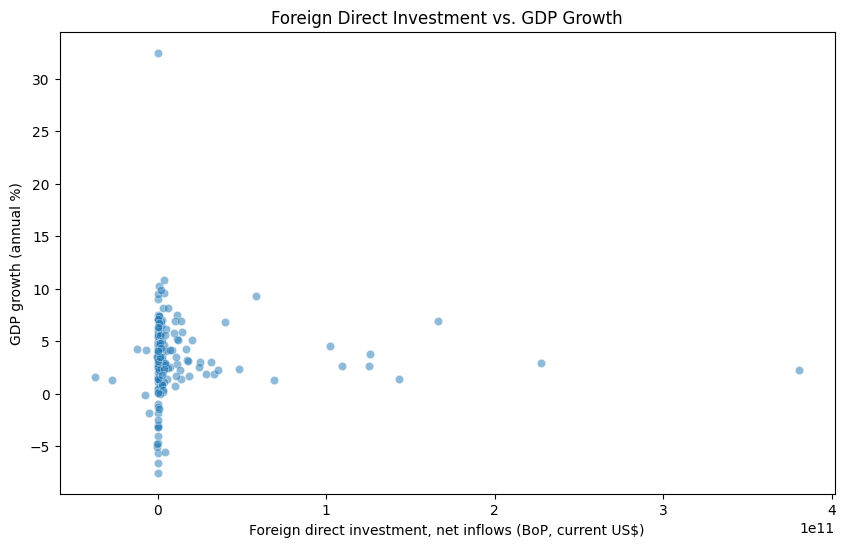

Correlation coefficient: 0.010132959523306995
P-value: 0.8890604830688738


In [31]:
# Cleaning out null values from our FDI and GDP columns. Assigns the cleaned data to a new dataset because we might want the dropped rows for different correlations that don't need these metrics. 
df_corr_1 = df.dropna(subset=['Foreign direct investment, net inflows (BoP, current US$)', 'GDP growth (annual %)'])

# Using the same DataFrame and columns as in the matplotlib example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Foreign direct investment, net inflows (BoP, current US$)', y='GDP growth (annual %)', data=df_corr_1, alpha=0.5)
plt.title('Foreign Direct Investment vs. GDP Growth')

plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_corr_1['Foreign direct investment, net inflows (BoP, current US$)'], df_corr_1['GDP growth (annual %)'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

This data seems misleading in that it's skewed by low and high outliers in the data, so we'll clean them from both the dataset.


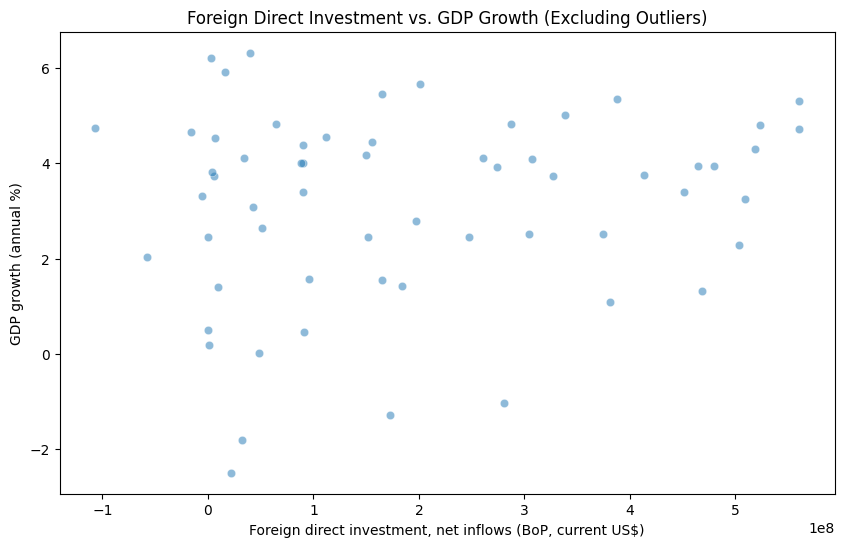

Correlation coefficient: 0.14970639008348255
P-value: 0.2535892129213938


In [39]:

# Lower and upper bounds for FDI
fdi_lower = df_corr_1["Foreign direct investment, net inflows (BoP, current US$)"].quantile(0.1)
fdi_upper = df_corr_1["Foreign direct investment, net inflows (BoP, current US$)"].quantile(0.9)

# Lower and upper bounds for GDP Growth
gdp_growth_lower = df_corr_1["GDP growth (annual %)"].quantile(0.1)
gdp_growth_upper = df_corr_1["GDP growth (annual %)"].quantile(0.9)

# Filter the DataFrame to exclude outliers from both FDI and GDP growth
df_filtered = df_corr_1[
    (df_corr_1["Foreign direct investment, net inflows (BoP, current US$)"] >= fdi_lower) & 
    (df_corr_1["Foreign direct investment, net inflows (BoP, current US$)"] <= fdi_upper) &
    (df_corr_1["GDP growth (annual %)"] >= gdp_growth_lower) & 
    (df_corr_1["GDP growth (annual %)"] <= gdp_growth_upper)
]

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Foreign direct investment, net inflows (BoP, current US$)', 
                y='GDP growth (annual %)', 
                data=df_filtered, 
                alpha=0.5)
plt.title('Foreign Direct Investment vs. GDP Growth (Excluding Outliers)')
plt.xlabel('Foreign direct investment, net inflows (BoP, current US$)')
plt.ylabel('GDP growth (annual %)')
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_filtered['Foreign direct investment, net inflows (BoP, current US$)'], df_filtered['GDP growth (annual %)'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


It looks like there could be a relationship here, but the p-value isn't really strong enough to draw any correlations from this data. 

### GDP Per Capita vs. Life Expectancy


Is there a relationship between GDP per Capita and Life Expectancy? There could plausibly be a one, given that rich countries have better equipped medical systems. Let's test that. 

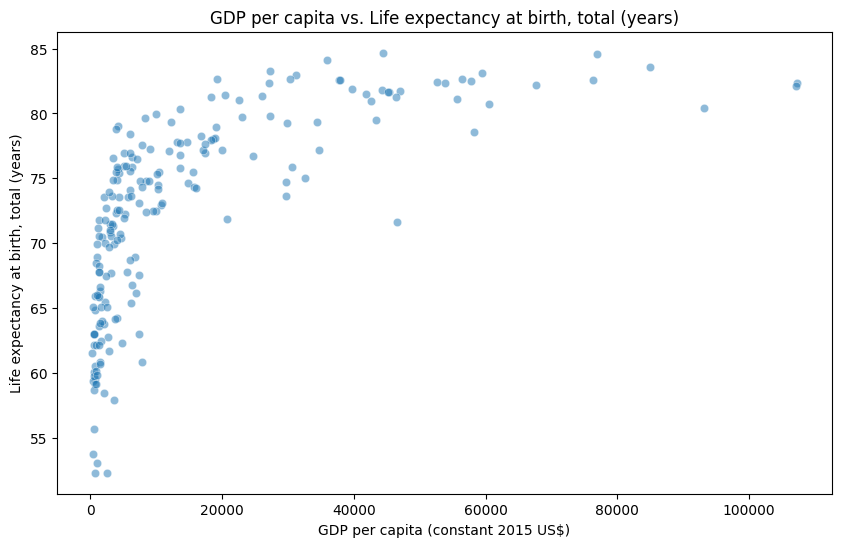

Correlation coefficient: 0.6491985718200615
P-value: 2.5635729329303725e-25


In [42]:
# Cleaning out null values from our FDI and GDP columns. Assigns the cleaned data to a new dataset because we might want the dropped rows for different correlations that don't need these metrics. 
df_corr_2 = df.dropna(subset=['GDP per capita (constant 2015 US$)', 'Life expectancy at birth, total (years)'])

# Using the same DataFrame and columns as in the matplotlib example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita (constant 2015 US$)', y='Life expectancy at birth, total (years)', data=df_corr_2, alpha=0.5)
plt.title('GDP per capita vs. Life expectancy at birth, total (years)')

plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_corr_2['GDP per capita (constant 2015 US$)'], df_corr_2['Life expectancy at birth, total (years)'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

This data is more encouraging! The p-value is very low, and there's a strong positive correlation between GDP per capita and life expectancy. Life expectancy starts to level off as countries pass a certain GDP per capita, presumably because they just get diminishing returns from their wealth (ie they're getting mostly the same treatments and eating mostly the same food).

### Net Migration and GDP per Capita

Is there a relationship between Net Migration and GPP per Capita? The idea here is that countries with a higher GDP per capita may have higher net migration into the country because they provide more opportunities for migrants.

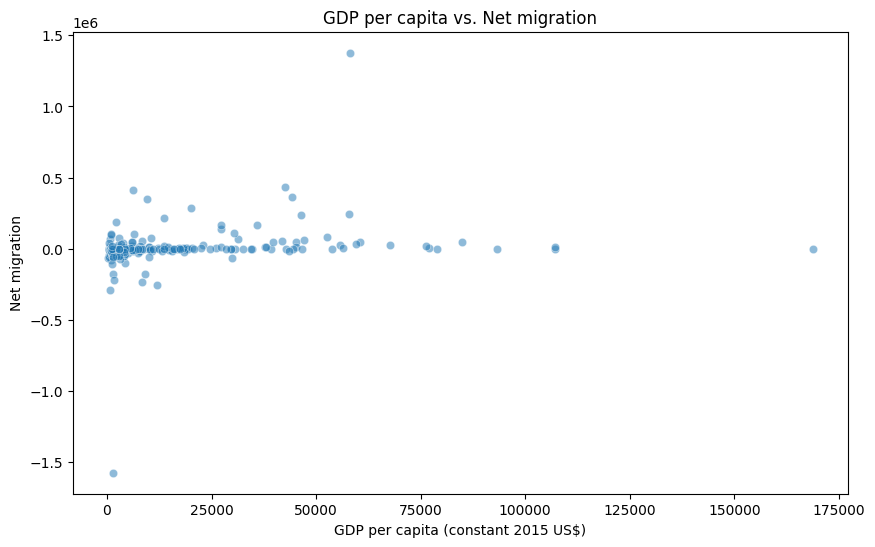

Correlation coefficient: 0.20711036011485381
P-value: 0.0027508504306793338


In [45]:
# Cleaning out null values from our FDI and GDP columns. Assigns the cleaned data to a new dataset because we might want the dropped rows for different correlations that don't need these metrics. 
df_corr_3 = df.dropna(subset=['GDP per capita (constant 2015 US$)', 'Net migration'])

# Using the same DataFrame and columns as in the matplotlib example
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita (constant 2015 US$)', y='Net migration', data=df_corr_3, alpha=0.5)
plt.title('GDP per capita vs. Net migration')

plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_corr_3['GDP per capita (constant 2015 US$)'], df_corr_3['Net migration'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')

There seem to be some high outliers here as well. They could well be interesting case studies and add to our understanding of how migration works, but we're more trying to understand how GDP per capita affects net migration for the typical country, so let's filter out our outliers here. 

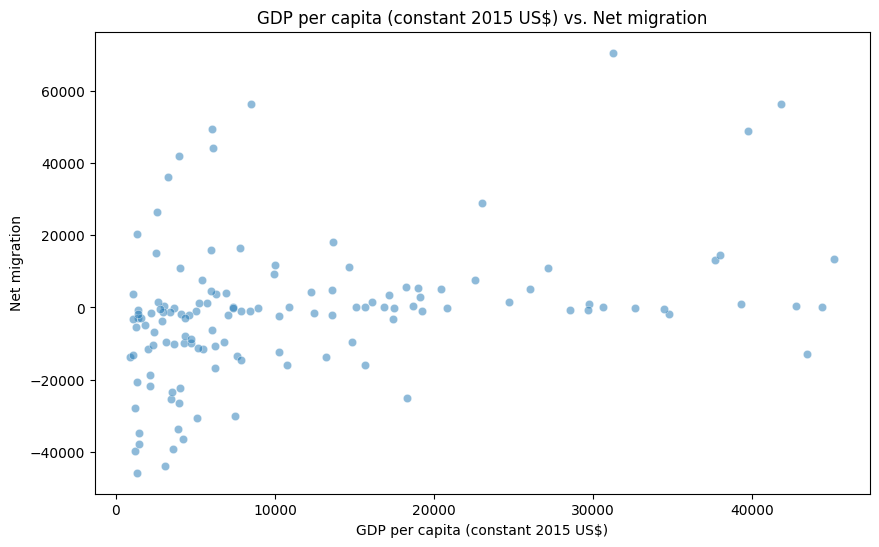

Correlation coefficient: 0.3471573527938572
P-value: 4.539046174836025e-05


In [48]:

# Lower and upper bounds for GDP/capita
gdp_lower = df_corr_3["GDP per capita (constant 2015 US$)"].quantile(0.1)
gdp_upper = df_corr_3["GDP per capita (constant 2015 US$)"].quantile(0.9)

# Lower and upper bounds for net migration
migration_lower = df_corr_3["Net migration"].quantile(0.1)
migration_upper = df_corr_3["Net migration"].quantile(0.9)

# Filter the DataFrame to exclude outliers from both FDI and GDP growth
df_filtered = df_corr_3[
    (df_corr_3["GDP per capita (constant 2015 US$)"] >= gdp_lower) & 
    (df_corr_3["GDP per capita (constant 2015 US$)"] <= gdp_upper) &
    (df_corr_3["Net migration"] >= migration_lower) & 
    (df_corr_3["Net migration"] <= migration_upper)
]

# Plot the filtered data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP per capita (constant 2015 US$)', 
                y='Net migration', 
                data=df_filtered, 
                alpha=0.5)
plt.title('GDP per capita (constant 2015 US$) vs. Net migration')
plt.xlabel('GDP per capita (constant 2015 US$)')
plt.ylabel('Net migration')
plt.show()

# Calculate the Pearson correlation coefficient
correlation, p_value = pearsonr(df_filtered['GDP per capita (constant 2015 US$)'], df_filtered['Net migration'])

print(f'Correlation coefficient: {correlation}')
print(f'P-value: {p_value}')


The data hasn't changed much after removing outliers -- there is still a positive correlation between GDP per capita and net migration, which makes sense. Interestingly, it's not binary -- some rich countries don't have much more net migration than the average poor country, and some poor countries have very high net migration. 